In [2]:
#importing packagess
import xarray
import numpy  as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from netCDF4 import Dataset
from matplotlib.dates import DateFormatter
import matplotlib as mpl
from datetime import datetime
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

In [3]:
# importing data set
ds_1part = xarray.load_dataset('/home/sm4219/download_new_23_lateryears.nc', engine="netcdf4")
ds_2part = xarray.load_dataset('/home/sm4219/download_new_23.nc', engine="netcdf4")

updated_ds_1 = ds_1part.sel(latitude = 51.145 , longitude = -1.44, method = 'nearest')
updated_ds_2 = ds_2part.sel(latitude = 51.145 , longitude = -1.44, method = 'nearest')

ds_grid = [updated_ds_1 ,updated_ds_2]
updated_ds = xarray.combine_by_coords(ds_grid, combine_attrs='override')

print(updated_ds['time'])

/home/sm4219/miniconda3/envs/myenv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.19.1
  warnings.warn(


<xarray.DataArray 'time' (time: 36413)>
array(['2014-01-01T06:00:00.000000000', '2014-01-01T07:00:00.000000000',
       '2014-01-01T08:00:00.000000000', ..., '2022-12-29T16:00:00.000000000',
       '2022-12-29T17:00:00.000000000', '2022-12-29T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    longitude  float32 -1.4
    latitude   float32 52.0
  * time       (time) datetime64[ns] 2014-01-01T06:00:00 ... 2022-12-29T18:00:00
Attributes:
    long_name:  time


In [4]:
# total_clouds = (updated_ds.variables['tcc'])
total_column_w = (updated_ds.variables['tcwv'])
low_clouds = (updated_ds.variables['lcc'])
high_clouds = (updated_ds.variables['hcc'])
timew = (updated_ds.variables['time'])

total_column_w2 = np.array(total_column_w)
# total_clouds2 = np.array(total_clouds)
timew2 = np.array(timew)
low_clouds2 = np.array(low_clouds)
high_clouds2 = np.array(high_clouds)


months = []

for i in range(len(timew2)):
    months.append(int(np.datetime_as_string(timew2[i], unit='M').split('-')[1]))

years = []
for j in range(len(timew2)):
    years.append(int(np.datetime_as_string(timew2[j], unit='Y').split('-')[0]))


# Extract days from each datetime object
days = []
for k in range(len(timew2)):
    day = int(np.datetime_as_string(timew2[k], unit='D').split('-')[-1])
    days.append(day)

# Create xarray Dataset
ds = xarray.Dataset({
    'total_column_w': ('time', total_column_w),
    'high_cloud': ('time', high_clouds),
    # 'total_clouds': ('time', total_clouds),
    'low_cloud': ('time', low_clouds),
    'years': ('time', years),
    'months': ('time', months),
    'days': ('time', days)
}, coords={'time': timew2})

ds2 = xarray.Dataset({
    'total_column_w': ('time', total_column_w),
    'low_cloud': ('time', low_clouds),
    # 'total_clouds': ('time', total_clouds),
    'years': ('time', years),
    'months': ('time', months)
}, coords={'time': timew2})


In [33]:

# for y in single_years:
#       year_data = ds.where(ds['years'] == y, drop=True)
#       monthly_data = ds.where(year_data['months'] == 6, drop=True)

#     #   Plot data
#       ax.plot(monthly_data['low_cloud'], monthly_data['days'], label=f'Year {y}')


# plt.show()

"""
for y in single_years:
    year_data = filtered_data.where(filtered_data['years'] == y, drop=True)
    monthly_data = year_data.where(year_data['months'] == 1, drop=True)
    daily_data = monthly_data['days']
    print(len(daily_data))

    num_instance = []

    for day in range(1, 32):  # assuming 1-31 days in a month
        daily_data = monthly_data.where(monthly_data['days'] == day, drop=True)
        num_instance.append(len(daily_data['low_cloud']))

    print(f'Year {y}: {num_instance}')
    
    # Check if there is data for the selected year and month
    if not monthly_data['low_cloud'].isnull().all():
        # Plot data
        print(monthly_data['days'], 'ehhh',monthly_data['low_cloud'] )
        ax.plot(range(1, 32), num_instance, 'o', alpha=0.5, label=f'Year {y}')

"""

# Choosing data and plotting
filtered_data = ds.where((ds['low_cloud'] < 0.3) & (ds['total_column_w'] < 15))

# single_years = [2014.]
# Extend single_years to include the years 2014. through 2022.
single_years = [float(year) for year in range(2014, 2023)]



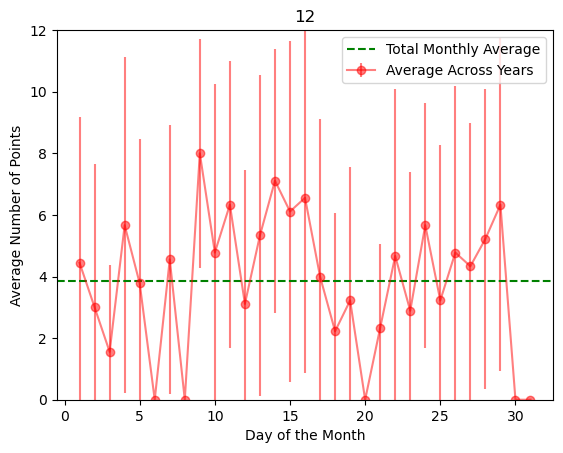

In [34]:
import matplotlib.pyplot as plt
import numpy as np
"WORKING CODE"

# Assuming you have already defined single_years, filtered_data, and other necessary variables

fig, ax = plt.subplots()

# Lists to store averages and standard deviations for each day
avg_values = []
std_dev_values = []
total_monthly_avg = []
month_new = 12

for day in range(1, 32):  # assuming 1-31 days in a month
    # Lists to store values for each year
    daily_values = []

    for y in single_years:
        year_data = filtered_data.where(filtered_data['years'] == y, drop=True)
        monthly_data = year_data.where(year_data['months'] == month_new, drop=True)
        
        # Extract data for the specific day
        daily_data = monthly_data.where(monthly_data['days'] == day, drop=True)
        
        # Append the number of points to the list
        daily_values.append(len(daily_data['low_cloud']))

    # Calculate average and standard deviation
    avg = np.mean(daily_values)
    std_dev = np.std(daily_values)

    # Append to the lists
    avg_values.append(avg)
    std_dev_values.append(std_dev)

# Append the total monthly average for each day
total_monthly_avg.append(np.mean(avg_values))

# Plotting
ax.errorbar(range(1, 32), avg_values, yerr=std_dev_values, fmt='o-', alpha=0.5, label='Average Across Years', color='red')
ax.axhline(y=np.mean(total_monthly_avg), linestyle='--', color='green', label='Total Monthly Average')

# Customize the plot (optional)
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Average Number of Points')
ax.legend()
ax.set_ylim(0,12)
ax.set_title( month_new)

plt.show()


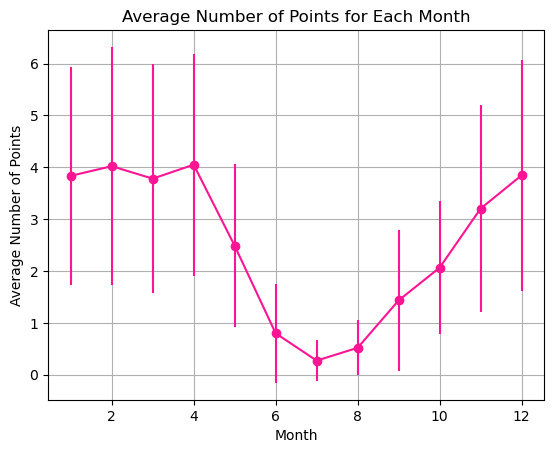

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already defined single_years, filtered_data, and other necessary variables

fig, ax = plt.subplots()

# Lists to store averages for each month
monthly_avg_values = []
std_m = []

# Iterate over each month
for month in range(1, 13):
    # Lists to store daily averages for the current month
    daily_avg_values = []

    # Iterate over each day of the month
    for day in range(1, 32):
        # Lists to store values for each year
        daily_values = []

        # Iterate over each year
        for year in single_years:
            year_data = filtered_data.where(filtered_data['years'] == year, drop=True)
            monthly_data = year_data.where(year_data['months'] == month, drop=True)
            
            # Extract data for the specific day
            daily_data = monthly_data.where(monthly_data['days'] == day, drop=True)
            
            # Append the number of points to the list
            daily_values.append(len(daily_data['low_cloud']))
        
        # Calculate the average number of points for the current day
        daily_avg = np.mean(daily_values)
        daily_avg_values.append(daily_avg)
        std_dev = np.std(daily_values)

    # Calculate the average number of points for the current month
    monthly_avg = np.mean(daily_avg_values)
    monthly_avg_values.append(monthly_avg)
    std_dev_m = np.std(daily_avg_values)
    std_m.append(std_dev_m)

# Plotting
plt.errorbar(range(1, 13), monthly_avg_values, marker='o', yerr=std_m, color='deeppink')
plt.xlabel('Month')
plt.ylabel('Average Number of Points')
plt.title('Average Number of Points for Each Month')
plt.grid(True)
plt.show()
